In [1]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Using TensorFlow backend.


In [2]:
def myfunc(t):
    A = 1
    B = np.random.rand(1)
    C = np.random.rand(1)
    D = 100 + np.random.rand(1)
    E = np.random.rand(1)
    F = 0 # having trouble shifting graph -- get exact values and plot on Desmos
    return (A * np.exp(-(np.square((t-F)-B))/(np.square(C))) * np.sin(D*t + E))
    
def noisy(y):
    # noise = np.random.uniform(-0.5, 0.5, size=y.shape)
    snr_inverse = 2
    noise = snr_inverse * np.random.normal(0,1,8192)
    
    # Normalize data so that variance is 1 (when we don't know the SNR of signal)
    
    return y + noise

t = np.linspace(-2, 3, 8192)

# Generate training data
clean_data = []
noisy_data = []
for i in range(4500):
    clean_data.append(t)
    clean_data[i] = myfunc(clean_data[i])
    noisy_data.append(t)
    noisy_data[i] = noisy(clean_data[i])

# Generate test data
clean_data_test = []
noisy_data_test = []
for i in range(500):
    clean_data_test.append(t)
    clean_data_test[i] = myfunc(clean_data_test[i])
    noisy_data_test.append(t)
    noisy_data_test[i] = noisy(clean_data_test[i])

# Convert Python Lists to NumPy Arrays
x_train = np.asarray(noisy_data)
y_train = np.asarray(clean_data)
x_test = np.asarray(noisy_data_test)
y_test = np.asarray(clean_data_test)

Example from Training Data:


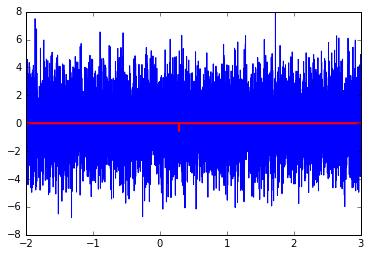

Example from Testing Data:


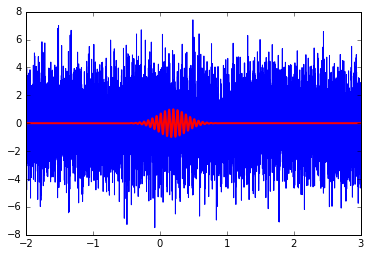

In [3]:
print("Example from Training Data:")
plt.cla()
plt.plot(t, noisy_data[int(np.random.uniform(0, 4500))], "b-")
plt.plot(t, clean_data[int(np.random.uniform(0, 4500))], "r-", linewidth=2.0)
plt.show()

print("Example from Testing Data:")
plt.cla()
plt.plot(t, noisy_data_test[int(np.random.uniform(0, 500))], "b-")
plt.plot(t, clean_data_test[int(np.random.uniform(0, 500))], "r-", linewidth=2.0)
plt.show()

In [4]:
def build_model():
    
    model = Sequential()

    model.add(Dense(8192, input_shape=(8192,)))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer="rmsprop")
        
    return model

In [5]:
epochs = 200
global_start_time = time.time()

model = build_model()

model.fit(x_train,
          y_train,
          batch_size=64,
          nb_epoch=epochs,
          validation_split=0.1)

predicted = model.predict(x_test)

print((time.time() - global_start_time) / 60)

/home/arjung2/.local/lib/python2.7/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 4050 samples, validate on 450 samples
Epoch 1/200
4050/4050 [==============================] - 8s 2ms/step - loss: 22172.2215 - val_loss: 0.0243
Epoch 2/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0655 - val_loss: 0.0523
Epoch 3/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0474 - val_loss: 0.0241
Epoch 4/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0286 - val_loss: 0.0247
Epoch 5/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0282 - val_loss: 0.0218
Epoch 6/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0240 - val_loss: 0.0237
Epoch 7/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0222 - val_loss: 0.0225
Epoch 8/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0210 - val_loss: 0.0204
Epoch 9/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0204 - val_loss: 0.0201
Epoch 10/200
4050/4050

4050/4050 [==============================] - 6s 2ms/step - loss: 5.9243e-04 - val_loss: 0.0074
Epoch 79/200
4050/4050 [==============================] - 6s 2ms/step - loss: 5.6598e-04 - val_loss: 0.0072
Epoch 80/200
4050/4050 [==============================] - 6s 2ms/step - loss: 5.5260e-04 - val_loss: 0.0077
Epoch 81/200
4050/4050 [==============================] - 6s 2ms/step - loss: 5.5323e-04 - val_loss: 0.0076
Epoch 82/200
4050/4050 [==============================] - 6s 2ms/step - loss: 5.4245e-04 - val_loss: 0.0080
Epoch 83/200
4050/4050 [==============================] - 6s 2ms/step - loss: 5.6348e-04 - val_loss: 0.0077
Epoch 84/200
4050/4050 [==============================] - 6s 2ms/step - loss: 5.2241e-04 - val_loss: 0.0078
Epoch 85/200
4050/4050 [==============================] - 6s 2ms/step - loss: 5.3378e-04 - val_loss: 0.0078
Epoch 86/200
4050/4050 [==============================] - 6s 2ms/step - loss: 5.2403e-04 - val_loss: 0.0077
Epoch 87/200
4050/4050 [=================

4050/4050 [==============================] - 6s 2ms/step - loss: 3.5376e-04 - val_loss: 0.0077
Epoch 154/200
4050/4050 [==============================] - 6s 2ms/step - loss: 3.3833e-04 - val_loss: 0.0075
Epoch 155/200
4050/4050 [==============================] - 6s 2ms/step - loss: 3.4435e-04 - val_loss: 0.0075
Epoch 156/200
4050/4050 [==============================] - 6s 2ms/step - loss: 3.4522e-04 - val_loss: 0.0078
Epoch 157/200
4050/4050 [==============================] - 6s 2ms/step - loss: 3.3540e-04 - val_loss: 0.0078
Epoch 158/200
4050/4050 [==============================] - 6s 2ms/step - loss: 3.2947e-04 - val_loss: 0.0080
Epoch 159/200
4050/4050 [==============================] - 6s 2ms/step - loss: 3.4479e-04 - val_loss: 0.0080
Epoch 160/200
4050/4050 [==============================] - 6s 2ms/step - loss: 3.2749e-04 - val_loss: 0.0077
Epoch 161/200
4050/4050 [==============================] - 6s 2ms/step - loss: 3.3517e-04 - val_loss: 0.0073
Epoch 162/200
4050/4050 [========

In [17]:
t_two = np.linspace(-2, 3, 8192)
avg_mse = 0.0
count_0 = 0
count_1 = 0
for i in range(500):
    avg_mse += np.square(np.sum(y_test[i] - predicted[i]))
    if np.square(np.sum(y_test[i] - predicted[i])) > 300:
        count_1 += 1
    if np.square(np.sum(y_test[i] - predicted[i])) < 0.5:
        count_0 += 1
        
print("Number less than 0.5:", count_0)
print("Number more than 100:", count_1)
print("Average MSE: ", avg_mse / 500)

('Number less than 0.5:', 452)
('Number more than 100:', 6)
('Average MSE: ', 7.2470562696983531)


A Sample of the Results:
('MSE: ', 0.0023971181512338919)


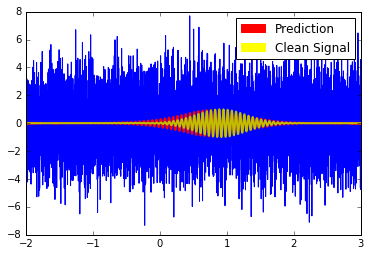

('MSE: ', 0.0041317571999447515)


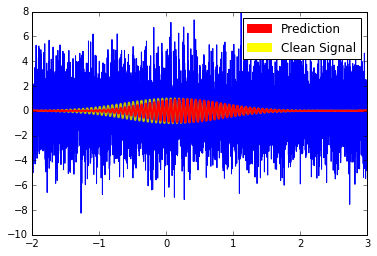

('MSE: ', 0.0004471028416731401)


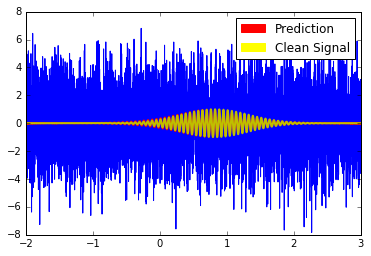

('MSE: ', 0.089117970706596161)


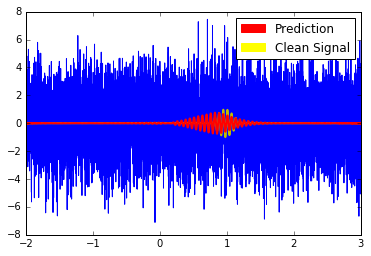

('MSE: ', 0.0023305332422665181)


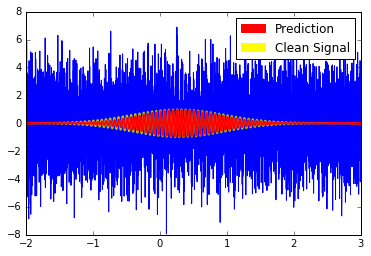

In [18]:
print("A Sample of the Results:")

n = 3
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 4
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 7
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 6
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 10
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()
